# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Importing the dataset

In [3]:
df=pd.read_csv("C:/Users/Anirudh/Desktop/Iris.csv")

# Knowing the dataset

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.shape

(150, 6)

In [9]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Clustering

In [12]:
# Finding the optimal number of clusters for k-means classification
SSD=[]
K=range(1,15)
x = df.iloc[:, [1, 2, 3,4]].values

for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(x)
    SSD.append(km.inertia_)

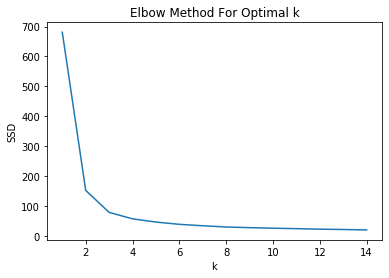

In [13]:
plt.plot(K, SSD)
plt.xlabel('k')
plt.ylabel('SSD')
plt.title('Elbow Method For Optimal k')
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (SSD) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

In [14]:
# Applying kmeans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(x)

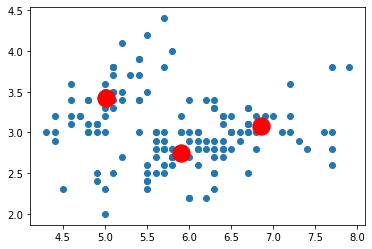

In [17]:
# Plotting the centroids of the clusters
plt.scatter(x[:,0],x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()

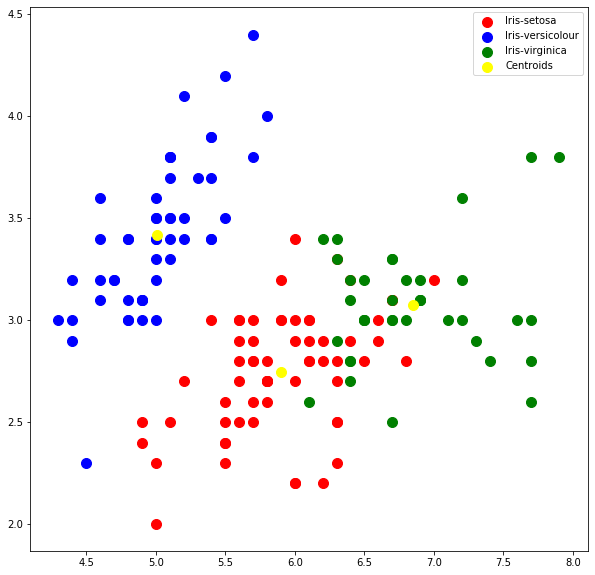

In [29]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))

plt.scatter(x[pred_y==0,0],x[pred_y==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[pred_y==1,0],x[pred_y==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[pred_y==2,0],x[pred_y==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show() 